# Colab 3
Link to colab 
https://colab.research.google.com/drive/1IQVKf8xx1GrAdql8N2O_ejgJsyCRLN7I

# Unsupervised learning

# Importing, Loading and Preperation

In [0]:
#Import most standard packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Load features
!wget https://www.dropbox.com/s/1wicz60figuzwpb/clean_dataframe-8.csv?dl=0 #without outliers
!wget https://www.dropbox.com/s/jchj5huazph1htx/out_dataframe-8.csv?dl=0 #with outliers

--2019-09-26 18:12:57--  https://www.dropbox.com/s/1wicz60figuzwpb/clean_dataframe-8.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1wicz60figuzwpb/clean_dataframe-8.csv [following]
--2019-09-26 18:12:58--  https://www.dropbox.com/s/raw/1wicz60figuzwpb/clean_dataframe-8.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d64c72a9a8f465070e73c00de.dl.dropboxusercontent.com/cd/0/inline/ApQZlBJ3JToouJBcMVXuEoZuIGeV3gGnPuPlQ2yQcF4xzcxHC3BPq-nTYGvtI-jAx8dESshXSLzJN3MD4q7fOtXI0aVc8NlB1l_LvUpRoJ7HXFhhjMgBjZfqL8mGJ-YL-48/file# [following]
--2019-09-26 18:12:58--  https://uc2d64c72a9a8f465070e73c00de.dl.dropboxusercontent.com/cd/0/inline/ApQZlBJ3JToouJBcMVXuEoZuIGeV3gGnPuPlQ2yQcF4xzcxHC3BPq-nTYGvtI-jAx8dESshXSLzJN3MD4q

In [0]:
#Loadings csv files with and without out outliers so that the effects of the outliers can be seen.
df_clean2=pd.read_csv('clean_dataframe-8.csv?dl=0')  #without outliers
df_out2=pd.read_csv('out_dataframe-8.csv?dl=0')    #with outliers

### Choose the dataset!!

In [0]:
#Save df_out as the df to make run the analysis on it.
#Filter for Western Europe due to the problems mentioned in the data exploration & stakeholder report
#The fact that many terrorist attacks in Asia, the Middle East, & Africa don't follow our difinition of a terrist attack) 
df=df_out2[df_out2['region_txt_Western Europe']==1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11058 entries, 8 to 117185
Data columns (total 71 columns):
Unnamed: 0                                11058 non-null int64
timestamp                                 11058 non-null object
duration                                  11058 non-null int64
country_txt                               11058 non-null object
latitude                                  11058 non-null float64
longitude                                 11058 non-null float64
success                                   11058 non-null int64
nkill                                     11058 non-null float64
nkillter                                  11058 non-null float64
nwound                                    11058 non-null float64
property                                  11058 non-null float64
vicinity                                  11058 non-null float64
suicide                                   11058 non-null int64
claimed                                   11058 non-nul

### Scaling and initialising

In [0]:
#Importing the MinMaxScaler and saving to MMscaler_reduced
from sklearn.preprocessing import MinMaxScaler
MMscaler_reduced = MinMaxScaler()

*Reasons for choosing MinMaxScaler instead of Standard Scaler:*

The reason for usings this scaler instead of the standard scaler is that we don't want to de-enthisise the more extreme values.
Attacks such as the Madrid bomings, 11th of septmeber and other notable attacks don't follow the normal attack types, mentioned in the data exploration

The normal attacks, didn't kill or wound many people acording to our data exploration


In [0]:
#Saving the selected column names to a list we then use to create new data frame
features_dum=df.columns[6:58].tolist() #Armed_Assult : Radiological
features_nmf=df.columns[2:10].tolist() #Duration : Crit3
#We drop the data that we features for dum that aren't categorical, and drop the categorical variables from nmf-list.
features_dum.remove('gname')
features_dum.remove('nkill')
features_nmf.remove('nkill')
features_dum.remove('nkillter')
features_dum.remove('nwound')
features_nmf.remove('country_txt')
features_nmf.remove('success')

In [0]:
#We save the features into df_dum and df_nmf
#df_nmf contains the data we want to keep
#df_dum contain all our categorical variables
#We want first to redures our categorical variables into fewer and more usable features which we do with Non-negative Matrix Factorization (NMF)
df_dum = df.loc[:,features_dum]
df_nmf = df.loc[:,features_nmf]
df_nmf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11058 entries, 8 to 117185
Data columns (total 6 columns):
duration     11058 non-null int64
latitude     11058 non-null float64
longitude    11058 non-null float64
nkill        11058 non-null float64
nkillter     11058 non-null float64
nwound       11058 non-null float64
dtypes: float64(5), int64(1)
memory usage: 604.7 KB


# NMF

When reducing features, NMF is more suited for reducing categorical data, while keeping the patterns observed in them. After reducing the categorical data with NMF it become possible to viasulize it, and further reduce it with PCA.

PCA is usually used in language and image recognition. PCA creats Topics(new features) which are characterized by a pattern of the old features. We can then remove the old features without lossing information.

In [0]:
#Importing NMF, saving the model, specifying the desired number of components, and fitting the data
from sklearn.decomposition import NMF
model = NMF(n_components=7)
dummies_reduced = model.fit_transform(df_dum)

In [0]:
#Compressing the data into a data frame
dummies_reduced_components = pd.DataFrame(model.components_, columns=list(features_dum))
#Examining how the NMF grouped the observations into themes
#Thus we can redure 38 dummy variables into 7 features
for i in range(7):
  print("Most important features in component {}:" .format(i))
  print(dummies_reduced_components.iloc[i,:].nlargest())

Most important features in component 0:
Explosives           6.456892
Bombing_Explosion    6.422826
property             5.331915
crit1                4.963790
crit2                4.900358
Name: 0, dtype: float64
Most important features in component 1:
property                          4.202000
Incendiary                        4.181436
Facility_Infrastructure_Attack    3.835757
success                           3.821955
crit1                             3.395083
Name: 1, dtype: float64
Most important features in component 2:
Assassination    3.907799
crit1            3.137771
Firearms         3.053171
crit2            2.948409
success          2.783488
Name: 2, dtype: float64
Most important features in component 3:
Business    7.963511
crit3       2.744323
crit2       1.771894
crit1       1.652772
Unknown     0.672673
Name: 3, dtype: float64
Most important features in component 4:
Armed_Assault    3.524910
success          2.999794
Firearms         2.627024
crit1            2.182102


# PCA

To further reduce the the amount of features, we use Principal component analysis to find the most important features and kickout the less important ones.


In [0]:
#Importing PCA
from sklearn.decomposition import PCA
pca_reduced = PCA(n_components=13)

In [0]:
#We create a data frame with the new components from NMF
df_dummies_reduced = pd.DataFrame(data=dummies_reduced, columns=None)
df_nmf =df_nmf.reset_index(drop=True)
df_reduced = pd.merge(df_nmf, df_dummies_reduced, right_index=True, left_index=True)

In [0]:
#Scale the data set, using the fit transform method with the MinMax scaler
df_reduced_scaled = MMscaler_reduced.fit_transform(df_reduced)

In [0]:
#Fit our PCA model with the data from scaled combind dataframa
pca_data = pca_reduced.fit_transform(df_reduced_scaled)
pca_reduced.fit_transform(df_reduced_scaled)

array([[ 3.99731786e-01, -2.15998904e-01, -2.50186749e-01, ...,
        -2.12735614e-03,  1.41408698e-03, -1.95509359e-03],
       [ 7.09171234e-01,  1.58584240e-01,  7.14074531e-01, ...,
         1.63338576e-02,  1.79846374e-02,  2.03334983e-02],
       [-5.19537540e-01, -4.91863521e-02,  1.27733233e-01, ...,
        -5.46357509e-03, -3.37204792e-03, -1.20727664e-04],
       ...,
       [ 4.87299806e-01, -4.35362002e-01,  2.84123580e-01, ...,
        -5.54354276e-03,  1.55214789e-04, -2.11724396e-03],
       [ 4.86709544e-01, -4.32522513e-01,  2.84356096e-01, ...,
        -4.19330857e-03,  1.91091179e-03, -2.66012906e-03],
       [ 7.01109116e-01,  1.70007572e-01,  7.04295319e-01, ...,
        -5.16998214e-04, -3.27103058e-04,  1.64781424e-04]])

In [0]:
#Compute column names for visualizing PCA data
pca_features = range(pca_reduced.n_components_)

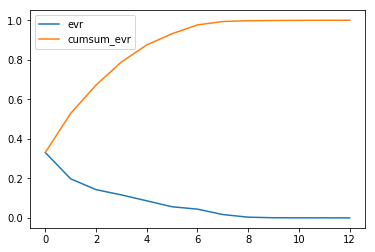

In [0]:
#Plot a graph showing how the explained variance by the number of components.
plot_data = pd.DataFrame({'evr': pca_reduced.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca_reduced.explained_variance_ratio_)}).stack()
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
#Viewing the explained variance in numeric terms
np.cumsum(pca_reduced.explained_variance_ratio_)

array([0.33098357, 0.52890614, 0.672118  , 0.78863349, 0.87534159,
       0.93184063, 0.97642074, 0.99362578, 0.99756882, 0.99859344,
       0.99927984, 0.99981529, 1.        ])

Here we can see how the first 5 features of the PCA explain 87% of the variation in the data.

Text(0, 0.5, 'Cumulative explained variance')

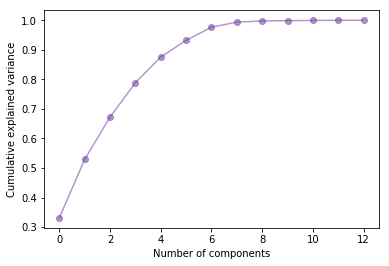

In [0]:
# The same as before but graphed
plt.plot(np.cumsum(pca_reduced.explained_variance_ratio_),'o-', c='#663399', alpha=.5)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Clustering with K-means on reduced data

In [0]:
#Import and save KMeans to use for clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans()

Text(0.5, 0, 'Number of clusters')

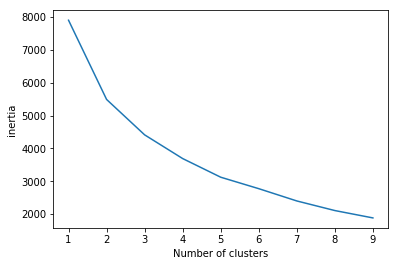

In [0]:
# Create a list inertia and a loop which fills out the list with  the .append function
# Then I map the inertia
inertia = []
for i in range(1,10):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(pca_data).inertia_)

sns.lineplot(y = inertia, x = range(1,10))
plt.ylabel('inertia')
plt.xlabel('Number of clusters')

Using the graph of the Inertia we can use the elbow method so select the number of clusters.There's no clear elbow other than at 2,  meaning at there are 3 clusters which expalin most of the variance before the effect of each cluster taper off

In [0]:
#select number of clusters
kmeans_NMF = KMeans(n_clusters=3)
kmeans_NMF.fit_transform(pca_data)
# I creatte a new label using the predict function
new_labels = kmeans_NMF.predict(pca_data)
#Saving the cluster in the original data frame for later analysis
df_reduced['clusters'] = new_labels

Saving the clusters in the data allows us to use the insigts gained form PCA, and K-means to as data in the supervised part of the analysis.

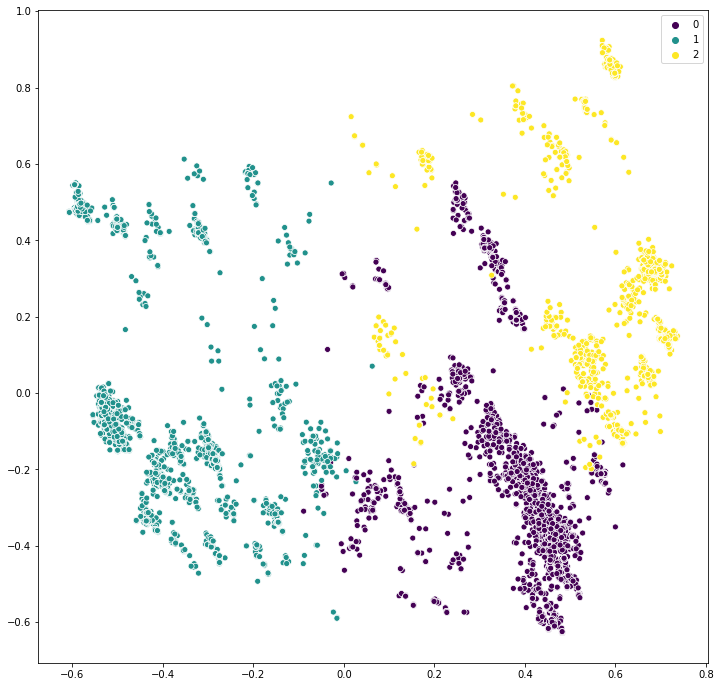

In [0]:
#The K-means view the how the is viewed, 
kmeans_NMF.fit(pca_data)
plt.figure(figsize=(12,12))
g = sns.scatterplot(pca_data[:,0], pca_data[:,1], hue=kmeans_NMF.labels_,
               legend='full', palette='viridis')

legend = g.get_legend()

# Data-exploration with new data and getting the data ready for exporting.

In [0]:
df_pca = pd.DataFrame(pca_data)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.399732,-0.215999,-0.250187,-0.172903,-0.057803,0.283264,0.082644,-0.024978,0.040893,-0.005536,-0.002127,0.001414,-0.001955
1,0.709171,0.158584,0.714075,0.058314,-0.087683,-0.076783,0.170682,-0.013326,-0.036630,0.001145,0.016334,0.017985,0.020333
2,-0.519538,-0.049186,0.127733,0.099583,-0.106444,0.109760,-0.139881,-0.127097,-0.014958,0.003247,-0.005464,-0.003372,-0.000121
3,-0.523817,-0.045627,0.121316,0.103489,-0.115272,0.140264,-0.101394,-0.076085,-0.012711,0.003249,0.030680,0.022381,0.168333
4,-0.500491,-0.098240,0.100876,0.098509,-0.081581,0.137787,0.108417,-0.029960,0.075687,-0.003089,-0.002610,-0.000553,0.000423


In [0]:
df_NMF = df_reduced
df_NMF.head()

,duration,latitude,longitude,nkill,nkillter,nwound,0,1,2,3,4,5,6,clusters
0,0,41.890961,12.490069,0.0,0.0,0.0,0.007111,0.018477,0.148493,0.015881,0.105200,0.020576,0.023419,1
1,0,48.139126,11.580186,7.0,0.0,9.0,0.000000,0.234118,0.000000,0.000000,0.000000,0.126214,0.000000,2
2,0,50.117970,8.644191,0.0,0.0,0.0,0.164973,0.021305,0.010729,0.006914,0.017171,0.007213,0.008459,0
3,0,47.368650,8.539182,47.0,0.0,0.0,0.164973,0.021305,0.010729,0.006914,0.017171,0.007213,0.008459,0
4,0,41.890961,12.490069,0.0,0.0,0.0,0.151800,0.000000,0.000000,0.009204,0.000000,0.023385,0.027713,0


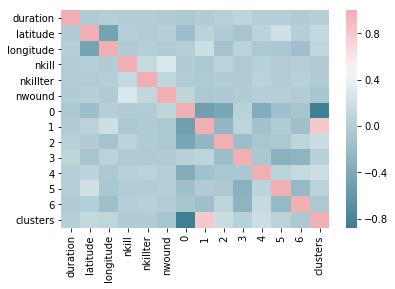

In [0]:
#Heatmap showing correlation between the different new features.
corr = df_NMF.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap=sns.diverging_palette(220, 10, as_cmap=True),center=0.5)


In [0]:
df_NMF.groupby(['clusters']).mean()

,duration,latitude,longitude,nkill,nkillter,nwound,0,1,2,3,4,5,6
clusters,,,,,,,,,,,,,
0,0.005254,46.260375,3.381315,0.320665,0.012785,1.944834,0.147003,0.011745,0.011222,0.034895,0.012974,0.027062,0.027373
1,0.501916,47.783309,1.305224,0.674330,0.016603,0.782567,0.009918,0.016941,0.142244,0.022711,0.097498,0.037590,0.047286
2,0.001354,47.812140,6.780138,0.026625,0.002256,0.198556,0.004777,0.212743,0.009272,0.043240,0.026292,0.032232,0.012209



Cluster 0 is characterized by having the largest amount of wounded with some people killed. The are also characterized by topic 0 which are include bomings and property damage.


Cluster 1 is characterized by having the largest amount of killed, with some wounded. Its is also characterized by topic 2 which include Succesful Assisinations and firearm attacks. This cluster also has the largest longest durations of the paterns seen in the data.


Cluster 2 is characterized by low killed and wounded. It is also characterized by a topic 1, which include sucessfull incindirary attack where faclilties were hit.